In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
from glob import glob
import csv
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Ass-4/Data/")

## **Data Visualization**

Observed question mark for missing values

In [88]:
df = pd.read_csv("population.csv")
df
# df.info(verbose=True)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


## **Data Pre-Processing**

*   Replacing missing values with NaN
*   Removing coloums with more than 40% data missing



In [0]:
df = pd.read_csv("population.csv", na_values=[" ?", "?", "? "])
# df

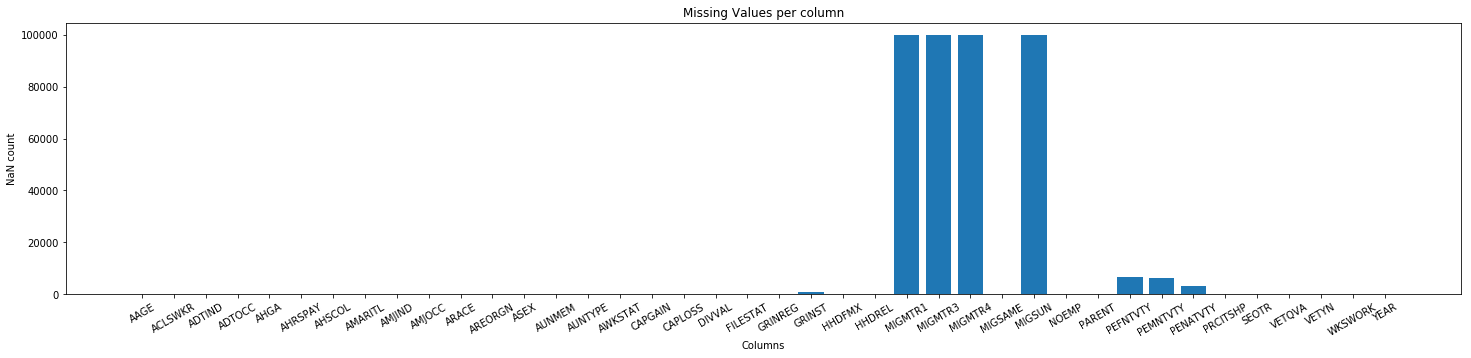

In [90]:
def BarNanCount(values, label):
    index = np.arange(len(label))
    f, ax = plt.subplots(figsize=(25,5))
    plt.bar(index, values)
    plt.xlabel('Columns')
    plt.ylabel('NaN count')
    plt.xticks(index, label,rotation=30)
    plt.title('Missing Values per column')
    plt.show()

NanCount = df.isnull().sum()
Labels = list(df.columns)
Values = list(NanCount)
BarNanCount(Values, Labels)

In [91]:
UselessColumns = list(df.columns[df.isnull().mean().gt(0.4)])
df = df.drop(UselessColumns, axis=1)
print("Removed Columns having more than 40% data values missing: ", UselessColumns)

Removed Columns having more than 40% data values missing:  ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']


## **Feature Analysis**


*   Histogram of the values for each feature
*   List item



Number of columns with numerical data type:	 12
Number of columns with categorical data type:	 24


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f901c6a6860>,
      dtype=object)

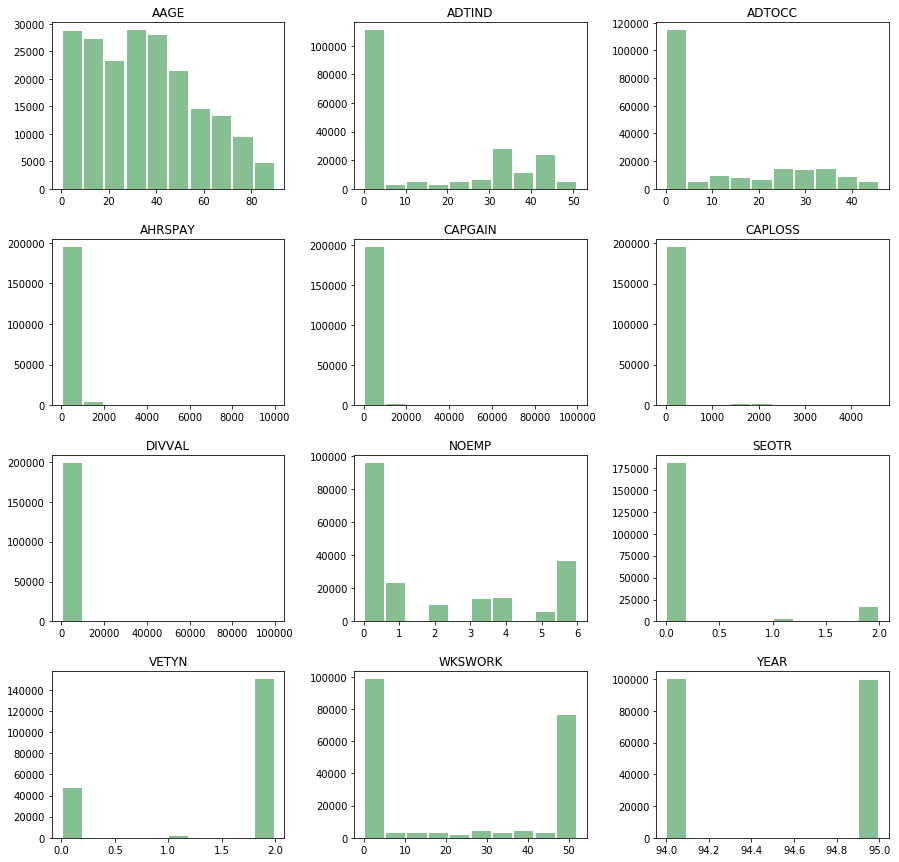

In [122]:
NumericalColumns = df.columns[df.dtypes == 'int64']
CategoricalColumns = df.columns[df.dtypes == 'object']
print("Number of columns with numerical data type:\t", len(NumericalColumns))
print("Number of columns with categorical data type:\t", len(CategoricalColumns))
df.hist(column=NumericalColumns, figsize=(15, 15), grid=False, color='#86bf91', zorder=2, rwidth=0.9)

AttributeError: ignored

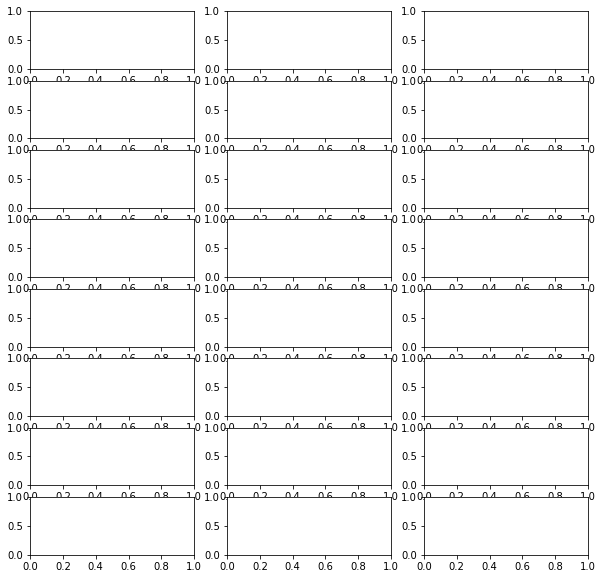

In [121]:
fig, ax = plt.subplots(len(CategoricalColumns)//3, 3, figsize=(10, 10))
for i in range(len(CategoricalColumns)):
    df[CategoricalColumns[i]].value_counts().plot(kind='bar', zorder=2)
    break
# TODO: plots of all categorical data